# Una Guida Introduttiva a CI/CD per il Machine Learning

L'Integrazione Continua (CI) e il Deployment Continuo (CD) sono pratiche comunemente usate nello sviluppo software per automatizzare il processo di integrazione delle modifiche al codice, testarle e rilasciare rapidamente l'applicazione aggiornata. Inizialmente, queste pratiche sono state sviluppate per applicazioni software tradizionali, ma stanno diventando sempre più rilevanti anche nei progetti di machine learning (ML).

In questa guida completa, daremo un'occhiata a CI/CD per ML e impareremo come costruire la nostra pipeline di machine learning che automatizzerà il processo di addestramento, valutazione e deployment del modello. Questa guida presenta un progetto semplice che utilizza solo GitHub Actions per automatizzare l'intero processo. La maggior parte delle cose che discuteremo sono ben note agli ingegneri di machine learning e ai data scientist. L'unica cosa che impareranno qui è come usare GitHub Actions, Makefile, CML e Hugging Face CLI.

## Perché CI/CD per il Machine Learning?
CI/CD è una svolta quando si tratta di rendere operativo il tuo modello e usarlo per sviluppare un prodotto. Semplificare il processo di automazione fornisce una soluzione priva di bug, veloce e scalabile per il tuo progetto ML, permettendoti di concentrarti sul miglioramento del modello piuttosto che sulla gestione e il deployment della soluzione. In particolare, CI/CD per il machine learning aiuta con quanto segue:

1.  **Automatizza la pipeline di addestramento**
    Con CI/CD, puoi riaddestrare automaticamente i tuoi modelli su nuovi dati a intervalli regolari, risparmiando tempo rispetto all'attivazione manuale del riaddestramento.
2.  **Individua precocemente gli errori**
    CI/CD aiuta a garantire che i modelli possano essere ricostruiti e riaddestrati esattamente allo stesso modo, consentendo la riproducibilità dei risultati. Ambienti, versionamento di modelli e dati, e configurazioni sono codificati.
3.  **Test e monitoraggio**
    CI/CD consente test automatizzati di nuovi modelli prima del deployment per verificare la presenza di problemi. Abilita anche un migliore monitoraggio dei modelli post-deployment attraverso l'integrazione con strumenti di monitoraggio.
4.  **Iterazione più rapida**
    Nuove versioni o esperimenti del modello possono essere rapidamente addestrati, testati e rilasciati in modo automatizzato con CI/CD. Accelera lo sviluppo e il miglioramento dei sistemi ML.
5.  **Scalabilità**
    Man mano che il progetto ML cresce in dimensioni e complessità, la gestione manuale dell'intero ciclo di vita diventa impraticabile. Le pipeline CI/CD forniscono una soluzione scalabile in grado di gestire grandi volumi di dati, numerosi modelli e diverse dipendenze mantenendo efficienza e affidabilità.

## Descrizione del Progetto
In questa guida, sarai accompagnato attraverso il processo di configurazione di account e ambienti, creazione di una pipeline CI/CD e ottimizzazione dell'intero processo. Utilizzeremo pipeline scikit-learn per addestrare il nostro algoritmo random forest e costruire un classificatore di farmaci. Dopo l'addestramento, automatizzeremo il processo di valutazione usando CML. Infine, costruiremo e rilasceremo l'applicazione web su Hugging Face Hub. Dall'addestramento alla valutazione, l'intero processo sarà automatizzato usando GitHub Actions. Tutto quello che devi fare è inviare (push) il codice al tuo repository GitHub e, entro due minuti, il modello sarà aggiornato su Hugging Face con l'app, il modello e i risultati aggiornati.

## Configurazione
In questa sezione, creeremo un repository GitHub, i file e le cartelle necessari, e uno Space su Hugging Face.

Aggiungi il nome e la descrizione del repository, seleziona il file README e imposta .gitignore come Python.

Dopo aver creato il repository, dobbiamo copiare il suo URL. Quindi, apri il terminale o la bash e naviga nella directory in cui vogliamo memorizzare la cartella del progetto.
Infine, clona il repository eseguendo il seguente comando:
```bash
git clone [https://github.com/....git)
```

Per iniziare, usa il tuo IDE preferito per aprire il repository locale. Raccomandiamo di usare VSCode per questo progetto. Una volta avviato il tuo IDE, vedrai un workspace VSCode contenente file come README e LICENSE.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Hugging Face Spaces
Creiamo uno [Hugging Face Space](https://huggingface.co/spaces) che useremo per rilasciare la nostra applicazione con il file del modello.
1.  Clicca sulla tua immagine del profilo e seleziona "New Space".
2.  Aggiungi il nome dello Space, la Licenza, il tipo di SDK e clicca su Create Space.
3.  Per modificare il file README.md, clicca sui tre puntini in alto a sinistra, seleziona Files e apporta le modifiche necessarie.
4.  Copieremo i metadati dal file README dello Space e li incolleremo nel nostro file README locale che rimarrà nella cartella App.

### File Essenziali
Dobbiamo creare la cartella e i file necessari prima di iniziare a sperimentare e costruire pipeline. Questo ci aiuterà nel lungo periodo a mantenere pulito lo spazio di lavoro.

**Crea Cartelle**
1.  **App:** per aggiungere il file del classificatore dell'app web, il file README dell'app con i metadati e `requirements.txt` per installare i pacchetti necessari.
2.  **Data:** per tutti i nostri file CSV.
3.  **Model:** per i file del modello addestrato.
4.  **Results:** per salvare metriche e risultati in file PNG.

**Cartella App**
Crea un file Python chiamato `drug_app.py`, insieme a un file `README.md` e un file `requirements.txt`, e sposta tutti questi file nella cartella App.

Contenuto di `App/README.md` (per Hugging Face Spaces):
```yaml
title: Drug Classification
emoji:
colorFrom: blue
colorTo: purple
sdk: gradio
sdk_version: 4.10. # O la versione che stai usando
app_file: app.py # O drug_app.py se lo rinomini per lo Space
pinned: false
license: apache-2.0
```

Modifica il file `requirements.txt` nella cartella `App` fornendo i pacchetti Python necessari per l'app Gradio:
Contenuto di `App/requirements.txt`:
```
gradio
scikit-learn
skops
pandas # Se usato direttamente nell'app per caricare/manipolare dati
```
Nota: i file requirement e README differiranno per il repository GitHub e lo Hugging Face Space. Il `requirements.txt` principale del repository conterrà pacchetti per l'addestramento e la CI, mentre quello nella cartella `App` è specifico per l'ambiente di esecuzione dell'app Gradio su Hugging Face.

**Cartella Data**
Scarica il dataset [Drug Classification da Kaggle](https://www.kaggle.com/datasets/prathamtripathi/drug-classification), estrai il file CSV e spostalo nella cartella `Data`.

**Cartelle Model e Results**
Entrambe le cartelle Model e Results rimarranno inizialmente vuote poiché saranno popolate dallo script Python che eseguiamo.

**File del Repository (nella root)**
1.  Crea un `Makefile` per semplificare l'esecuzione dello script nel workflow di GitHub Action.
2.  Crea un Jupyter Notebook chiamato `notebook.ipynb` (questo stesso file!). In questo notebook, sperimenteremo i nostri algoritmi e le pipeline di elaborazione.
3.  Crea un file `requirements.txt` (nella root). Sarà usato per configurare l'ambiente durante l'esecuzione dei job del workflow CI (addestramento, formattazione, ecc.).
    Contenuto di `requirements.txt` (root del progetto):
    ```
    pandas
    scikit-learn
    matplotlib
    skops
    # Per CML e Makefile
    black # Per la formattazione
    # Aggiungere altre dipendenze specifiche per l'addestramento se necessario
    ```
4.  Crea un file chiamato `train.py`. Conterrà codice Python per caricare ed elaborare i dati, nonché per addestrare, valutare e salvare il modello e le metriche di performance.

Ecco come dovrebbe apparire la struttura della tua directory principale del progetto:

```
CICD-for-Machine-Learning/            # Root del progetto
├── App/                              # File specifici per l'app Gradio
│   ├── drug_app.py                   # Script dell'app Gradio
│   ├── README.md                     # README per Hugging Face Space
│   └── requirements.txt              # Dipendenze per l'app Gradio
├── Data/                             # Dati grezzi
│   └── drug.csv
├── Model/                            # Modelli addestrati salvati
│   └── drug_pipeline.skops           # (Verrà creato da train.py)
├── Results/                          # Risultati della valutazione
│   ├── metrics.txt                   # (Verrà creato da train.py)
│   └── model_results.png             # (Verrà creato da train.py)
├── .github/                          # Workflow di GitHub Actions
│   └── workflows/
│       ├── ci.yml
│       └── cd.yml
├── .gitignore                        # File ignorati da Git
├── LICENSE                           # Licenza del progetto
├── Makefile                          # Comandi automatizzati
├── notebook.ipynb                    # Questo Jupyter Notebook
├── README.md                         # README principale del progetto
├── requirements.txt                  # Dipendenze per addestramento e CI
└── train.py                          # Script di addestramento del modello
```

## Addestramento e Valutazione del Modello di Classificazione dei Farmaci
In questa parte, sperimenteremo la creazione di codice Python che elabora i dati e addestra un modello usando una pipeline scikit-learn. Quindi lo valuteremo e salveremo i risultati e il modello.

### Caricamento del Dataset
Useremo pandas per caricare il nostro file CSV, mescolarlo usando la funzione `sample` e visualizzare le prime tre righe.

In [ ]:
import pandas as pd

# Assumendo che drug.csv sia in una sottocartella 'Data'
drug_df = pd.read_csv("/content/drive/MyDrive/SIAE/Week 1 - Foundations & Intro GenAI/Day 1 - Welcome & Setup/Live Coding/5 - github_actions_codebase_demo/Data/drug.csv")
# Aggiunto random_state per riproducibilità
drug_df = drug_df.sample(frac=1, random_state=42)
print("Prime tre righe del dataset mescolato:")
print(drug_df.head(3))

Prime tre righe del dataset mescolato:
    Age Sex      BP Cholesterol  Na_to_K   Drug
95   36   M     LOW      NORMAL   11.424  drugX
15   16   F    HIGH      NORMAL   15.516  DrugY
30   18   F  NORMAL      NORMAL    8.750  drugX


### Divisione Train Test
Crea una variabile dipendente e una variabile indipendente. Quindi dividile in set di addestramento e di test. Questo ti aiuterà a valutare le prestazioni del tuo modello.

In [ ]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1) # Manteniamo DataFrame per nomi colonne
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125, stratify=y # Aggiunto stratify per mantenere proporzioni classi
)
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")

Dimensioni X_train: (140, 5)
Dimensioni X_test: (60, 5)


### Creazione della Pipeline di Preprocessing e Addestramento
Costruiremo una pipeline di elaborazione usando `ColumnTransformer`, che convertirà i valori categorici in numeri, riempirà i valori mancanti e scalerà le colonne numeriche. Successivamente, creeremo una pipeline di addestramento che prenderà i dati trasformati e addestrerà un classificatore random forest. Infine, addestreremo il modello.
Usando le pipeline, possiamo garantire riproducibilità, modularità e chiarezza nel nostro codice.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Identificazione delle colonne categoriche e numeriche dai nomi
categorical_features = ['Sex', 'BP', 'Cholesterol']
numerical_features = ['Age', 'Na_to_K']

# Creazione dei trasformatori per le feature numeriche e categoriche
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    # Nota: OrdinalEncoder potrebbe essere usato se c'è un ordinamento intrinseco,
    # ma OneHotEncoder è generalmente più sicuro per variabili nominali in RandomForest.
])

# Creazione del ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creazione della pipeline finale con preprocessing e modello
model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=125, class_weight='balanced')) # Aggiunto class_weight
    ]
)

# Addestramento della pipeline
model_pipeline.fit(X_train, y_train)
print("Pipeline di addestramento completata.")

Pipeline di addestramento completata.


### Valutazione del Modello
Valuta le prestazioni del modello calcolando sia l'accuratezza che il punteggio F1.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

predictions = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro") # 'macro' per F1 non pesato tra classi

print(f"Accuratezza: {accuracy*100:.2f}%")
print(f"Punteggio F1 (Macro): {f1:.2f}")
print("\nReport di Classificazione Dettagliato:")
print(classification_report(y_test, predictions))

Accuratezza: 100.00%
Punteggio F1 (Macro): 1.00

Report di Classificazione Dettagliato:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Il nostro modello ha funzionato bene.

### Salvataggio delle Metriche e della Matrice di Confusione
Salviamo le metriche in un file di testo e generiamo e salviamo la matrice di confusione.

In [ ]:
import os
if not os.path.exists("Results"):
    os.makedirs("Results")

with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"Accuratezza: {accuracy:.2f}\n")
    outfile.write(f"Punteggio F1 (Macro): {f1:.2f}\n\n")
    outfile.write("Report di Classificazione Dettagliato:\n")
    outfile.write(classification_report(y_test, predictions))
print("Metriche salvate in Results/metrics.txt")

Metriche salvate in Results/metrics.txt


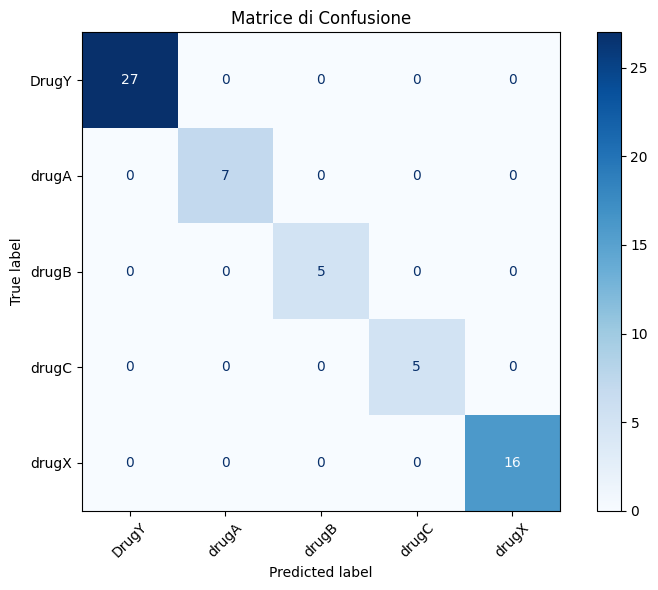

Matrice di confusione salvata in Results/model_results.png


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=model_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Matrice di Confusione")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Results/model_results.png", dpi=120)
plt.show()
print("Matrice di confusione salvata in Results/model_results.png")

### Salvataggio del Modello Addestrato
Ora salveremo la nostra pipeline completa (preprocessing + modello) usando il pacchetto Python `skops`. Questo ci aiuterà a salvare l'intera pipeline in un formato che può essere facilmente caricato per le predizioni.

In [ ]:
!pip install skops
import skops.io as sio
import os

if not os.path.exists("Model"):
    os.makedirs("Model")

# Il file .skops è un archivio zip, assicurati che il nome del file sia corretto.
sio.dump(model_pipeline, "Model/drug_pipeline.skops")
print("Pipeline del modello salvata in Model/drug_pipeline.skops")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 2.9 MB/s eta 0:00:00
Pipeline del modello salvata in Model/drug_pipeline.skops


Puoi semplicemente caricare l'intera pipeline, e funzionerà immediatamente senza ri-eseguire il preprocessing dei tuoi dati o apportare modifiche al codice.

In [ ]:
loaded_pipe = sio.load("/content/drive/MyDrive/SIAE/Week 1 - Foundations & Intro GenAI/Day 1 - Welcome & Setup/Live Coding/5 - github_actions_codebase_demo/Model/drug_pipeline.skops", trusted=True)
print("Pipeline caricata con successo.")
# Puoi fare una predizione di prova per verificare
try:
    sample_prediction = loaded_pipe.predict(X_test.iloc[:1]) # Usa iloc per DataFrame
    print(f"Predizione di prova su un campione: {sample_prediction}")
except Exception as e:
    print(f"Errore durante la predizione di prova: {e}")

TypeError: trusted must be a list of strings. Before version 0.10 trusted could be a boolean, but this is no longer supported, due to a reported CVE-2024-37065. You can pass the output of `get_untrusted_types` as trusted to load the data. Be sure to review the output of the function before passing it as trusted.

In [ ]:
from skops.io import load, get_untrusted_types

path = "/content/drive/MyDrive/SIAE/Week 1 - Foundations & Intro GenAI/Day 1 - Welcome & Setup/Live Coding/5 - github_actions_codebase_demo/Model/drug_pipeline.skops"

# 1. Ottieni la lista dei tipi non fidati usando il parametro keyword `file`
trusted_types = get_untrusted_types(file=path)

# (Opzionale) dai un’occhiata a cosa c’è dentro
print("Tipi non fidati trovati:", trusted_types)

# 2. Carica la pipeline passando quel risultato a `trusted`
loaded_pipe = load(path, trusted=trusted_types)
print("Pipeline caricata con successo.")

Tipi non fidati trovati: ['numpy.dtype']
Pipeline caricata con successo.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.4.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.4.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.0 when using version 1.6.1. This might lead to breaking code or i

### Creazione dello script `train.py`
Copia e incolla l'intero codice (da Caricamento del Dataset a Salvataggio del Modello) nel file `train.py`. Questo sarà lo script di addestramento standardizzato che verrà eseguito nel workflow CI ogni volta che c'è una modifica nei dati o nel codice.

(Puoi usare la magia `%%writefile train.py` in una cella di codice per creare questo file direttamente dal notebook, includendo tutte le celle di codice rilevanti da sopra).

## Passaggi per Costruire la Tua Pipeline di Integrazione Continua
In questa sezione, tratteremo CML, Makefile e la configurazione dei workflow di GitHub Action per automatizzare l'addestramento, la valutazione e il versionamento del nostro progetto.

### CI Pipeline

#### CML (Continuous Machine Learning)
Continuous Machine Learning (CML) è una libreria open-source che ti permette di implementare l'integrazione continua nei tuoi progetti di machine learning. Useremo la GitHub Action "iterative/setup-cml" che utilizza funzioni CML nel workflow per automatizzare la generazione del report di valutazione del modello. Cosa significa? Ogni volta che invii (push) modifiche a GitHub, genererà un report sotto il commit e ti invierà un'email con le metriche di performance e una matrice di confusione.

#### Makefile
Un `Makefile` è un file che consiste in un insieme di istruzioni usate dal comando `make` per automatizzare vari task, come compilare codice, eseguire test, configurare ambienti, preprocessare dati, addestrare e valutare modelli, e rilasciare modelli. Possiamo usare i comandi `make` per eseguire script multipli per rendere il file del workflow CI pulito e semplice. Il `Makefile` contiene il nome dell'insieme di comandi e lo script per eseguire quei comandi.
Ecco il nostro `Makefile`:

In [ ]:
%%writefile Makefile
# Installa le dipendenze per l'addestramento e gli strumenti CI
install:
	pip install --upgrade pip
	pip install -r requirements.txt # Questo usa il requirements.txt della root

# Formatta il codice Python usando Black
format:
	black *.py App/*.py # Formatta i file .py nella root e nella cartella App

# Esegue lo script di addestramento del modello
train:
	python train.py

# Genera un report di valutazione usando CML
eval:
	echo "## Metriche del Modello" > report.md
	# Assicurati che il percorso a metrics.txt sia corretto
	cat Results/metrics.txt >> report.md
	echo "\n\n## Grafico Matrice di Confusione" >> report.md
	# Assicurati che il percorso a model_results.png sia corretto
	echo "![Matrice di Confusione](./Results/model_results.png)" >> report.md
	cml comment create report.md

# Aggiungi altre regole se necessario, per esempio per pulire i file generati:
clean:
	rm -rf Model/* Results/* report.md __pycache__/ *.pyc App/__pycache__/ App/*.pyc
	# Aggiungi altre pulizie se necessario

Abbiamo comandi per installare pacchetti Python (`install`), formattare codice (`format`), eseguire script di addestramento (`train`), e generare report CML (`eval`).

Dopo aver preparato questi file, aggiungeremo le modifiche, creeremo un commit e invieremo (push) le modifiche al server remoto di GitHub.
```bash
git add .
git commit -m "Configurazione iniziale del progetto CI/CD per ML"
git push origin main
```


### GitHub Actions
Per automatizzare l'addestramento e la valutazione, dobbiamo creare un workflow di GitHub Action. Per fare ciò, crea una cartella `.github/workflows/` nel tuo repository e aggiungi un file YAML (es. `ci.yml`).

Ecco un esempio del contenuto del file `.github/workflows/ci.yml`:
1.  Aggiungi il nome del workflow.
2.  Imposta il trigger in modo che il workflow venga eseguito su un push o pull request al branch main o un'esecuzione manuale.
3.  Definisci i job. Configureremo un job `build` che verrà eseguito su un server Linux (ubuntu-latest).
4.  Definisci gli step all'interno del job: checkout del codice, setup di Python, installazione delle dipendenze, formattazione, addestramento e valutazione.
5.  Per il CML, è necessario impostare i permessi e fornire un token (GitHub Actions lo fornisce automaticamente come `secrets.GITHUB_TOKEN`).

In [ ]:
%%writefile .github/workflows/ci.yml
name: Integrazione Continua Modello ML

on:
  push:
    branches: [ "main", "develop" ] # Esegui su push a main o develop
  pull_request:
    branches: [ "main" ] # Esegui su pull request verso main
  workflow_dispatch: # Permette l'esecuzione manuale

permissions:
  contents: write # Necessario per CML per creare commenti/report
  pull-requests: write # Necessario per CML per commentare su PR

jobs:
  train_evaluate:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout del codice
        uses: actions/checkout@v4

      - name: Setup Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.9' # Specifica la tua versione di Python

      - name: Installa dipendenze
        run: make install
        # Alternativamente, se vuoi più controllo o caching:
        # run: |
        #   pip install --upgrade pip
        #   pip install -r requirements.txt

      - name: Formatta codice (linting)
        run: make format
        # Opzionale: fallisci il workflow se la formattazione cambia file
        # run: |
        #   make format
        #   git diff --exit-code --quiet || (echo "Il codice non è formattato correttamente. Esegui 'make format' localmente." && exit 1)

      - name: Addestra modello
        run: make train

      - name: Valuta modello e crea report CML
        uses: iterative/setup-cml@v2 # Setup CML
        # env:
          # REPO_TOKEN: ${{ secrets.GITHUB_TOKEN }} # GITHUB_TOKEN è di solito sufficiente
          # CML usa GITHUB_TOKEN per default se REPO_TOKEN non è esplicitamente impostato
      - run: make eval
        env:
          REPO_TOKEN: ${{ secrets.GITHUB_TOKEN }}

      # (Opzionale) Step per salvare artefatti come il modello addestrato o i risultati
      - name: Carica artefatti dei Risultati
        uses: actions/upload-artifact@v4
        with:
          name: model-results
          path: |
            Results/
            Model/
            report.md

Una volta che questo file è nel tuo repository, GitHub Actions lo rileverà ed eseguirà il workflow secondo i trigger definiti.

Potresti incontrare fallimenti mentre scopri errori e sintassi, motivo per cui è importante leggere la [Sintassi del workflow per GitHub Actions](https://docs.github.com/en/actions/using-workflows/workflow-syntax-for-github-actions) prima di immergerti nelle GitHub Action.

### Salvataggio dei Risultati in un Nuovo Branch (Opzionale, per Versionamento)
Stiamo generando il report di valutazione. Se vuoi versionare il modello e i risultati direttamente nel repository Git (alternativa a DVC o altri strumenti di versionamento di modelli/dati), puoi creare un nuovo branch (es. "update" o "gh-pages" per i report) e fare il push del modello aggiornato, dei risultati e del report lì.

**Aggiorna Makefile (aggiungi questo target per il versionamento dei risultati):**

In [ ]:
%%writefile -a Makefile

# Configura git, committa e fa il push del modello, risultati e report al branch 'update'
update-results-branch:
	# Configura l'utente git per questo workflow specifico (usa il bot di GitHub Actions)
	git config --global user.name 'github-actions[bot]'
	git config --global user.email 'github-actions[bot]@users.noreply.github.com'
	# Controlla se il branch 'update' esiste, altrimenti crealo
	git checkout update || git checkout -b update
	# Assicurati di essere aggiornato con la history remota, se necessario, o forza il push
	# git pull origin update # Opzionale, dipende dalla strategia
	# Aggiungi i file generati. Assicurati che questi file siano presenti e aggiornati.
	git add Model/drug_pipeline.skops Results/metrics.txt Results/model_results.png report.md
	# Committa solo se ci sono modifiche
	git commit -m "Aggiorna modello, risultati e report dall'esecuzione CI [skip ci]" || echo "Nessuna modifica da committare"
	# Fai il push al branch 'update'. L'opzione --force può essere pericolosa; usala con cautela.
	git push origin update

**Aggiorna `ci.yml` (aggiungi questo step al job `train_evaluate` se vuoi fare il push dei risultati):**

```yaml
# (All'interno degli steps del job train_evaluate in ci.yml, dopo 'make eval')
      - name: Pubblica risultati sul branch 'update'
        if: github.ref == 'refs/heads/main' # Esegui solo se il workflow è su main
        run: make update-results-branch
        # Potrebbe essere necessario fornire un token con permessi di scrittura se GITHUB_TOKEN predefinito non è sufficiente
        # env:
        #   GH_TOKEN: ${{ secrets.PERSONAL_ACCESS_TOKEN_WITH_WRITE_ACCESS }} # Se necessario
```
**Nota:** Per fare il push a un branch protetto o se si usano token specifici, potrebbe essere necessario configurare i secrets di GitHub (es. `GH_TOKEN`) e passarli allo script. Per il push da parte di `github-actions[bot]`, i permessi `contents: write` sul workflow dovrebbero essere sufficienti per i branch non protetti.

Una volta aggiornati i file e inviate (push) le modifiche al branch main, potrai vedere la magia accadere in tempo reale. Verrà generato un report analitico, insieme a un modello aggiornato che potrà essere rilasciato su Hugging Face nella parte di deployment continuo.

## Passaggi per Costruire la Tua Pipeline di Deployment Continuo (CD)
Nella sezione Deployment Continuo, scopriremo come automatizzare il processo di rilascio sia del modello che dell'applicazione. Ciò comporta il recupero (pull) del modello aggiornato e del file dell'applicazione (ad esempio, dal branch `update` se lo stai usando per versionare), l'accesso alla CLI di Hugging Face usando un token, l'invio (push) dei file del modello e dell'applicazione, e infine il rilascio dell'applicazione su Hugging Face Spaces.

### Costruzione dell'App Gradio
Per rilasciare il nostro modello e accedervi, dobbiamo creare un'app Gradio. Il codice per questa app sarà in `App/drug_app.py`. Questa app includerà:
1.  Caricamento della pipeline scikit-learn (modello) salvata da `skops`.
2.  Una funzione Python per predire le etichette dei farmaci in base all'input dell'utente.
3.  Creazione di un'interfaccia utente di input usando slider Gradio per valori float e radio Gradio per valori categorici.
4.  Creazione di input di esempio per testare facilmente il modello.
5.  Fornire il titolo dell'applicazione, una breve descrizione delle sue caratteristiche e funzionalità, e un piè di pagina che includa qualsiasi informazione rilevante.
6.  Forniremo tutte queste variabili e la funzione di predizione alla funzione `gr.Interface()` di Gradio e la avvieremo.
7.  Per rendere la nostra app web moderna, useremo un tema (`gr.themes.Soft()`).

Assicurati che il file `App/drug_app.py` contenga il codice Gradio finale. Ecco un riepilogo del codice che dovrebbe essere lì:

In [ ]:
%%writefile App/drug_app.py
import gradio as gr
import skops.io as sio
import os
import pandas as pd # Aggiunto per creare DataFrame di esempio

# Determina il percorso del modello.
# Quando eseguito su Hugging Face Spaces, il modello sarà probabilmente nella directory 'Model' relativa alla root dello Space.
model_file_name = 'drug_pipeline.skops'
model_path_in_space = f"./Model/{model_file_name}" # Percorso comune su HF Spaces se 'Model' è una cartella caricata
model_path_local = f"../Model/{model_file_name}" # Per test locali se App è sorella di Model

loaded_model = None
try:
    # Prova a caricare dal percorso dello Space prima
    if os.path.exists(model_path_in_space):
        loaded_model = sio.load(model_path_in_space, trusted=True)
    elif os.path.exists(model_path_local):
        loaded_model = sio.load(model_path_local, trusted=True)
    else:
        print(f"ERRORE: File modello '{model_file_name}' non trovato nei percorsi attesi.")
except Exception as e:
    print(f"ERRORE durante il caricamento del modello: {e}")

def predict_drug(age, sex, blood_pressure, cholesterol, na_to_k_ratio):
    if loaded_model is None:
        return "ERRORE: Modello non caricato correttamente. Controllare i log dello Space."
    try:
        # Crea un DataFrame per la predizione, con i nomi delle colonne come durante l'addestramento
        feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
        input_data = pd.DataFrame([[age, sex, blood_pressure, cholesterol, na_to_k_ratio]], columns=feature_names)

        # Conversione dei tipi se necessario, es. Age e Na_to_K a numerico
        input_data['Age'] = pd.to_numeric(input_data['Age'])
        input_data['Na_to_K'] = pd.to_numeric(input_data['Na_to_K'])

        predicted_drug = loaded_model.predict(input_data)[0]
        label = f"Farmaco Predetto: {predicted_drug}"
    except Exception as e:
        print(f"Errore durante la predizione: {e}")
        label = f"Errore nella predizione: Controlla i tipi di input o i log. ({e})"
    return label

inputs_ui = [
    gr.Slider(minimum=15, maximum=74, step=1, value=47, label="Età (anni)"),
    gr.Radio(["M", "F"], value="F", label="Sesso"),
    gr.Radio(["HIGH", "LOW", "NORMAL"], value="LOW", label="Pressione Sanguigna (BP)"),
    gr.Radio(["HIGH", "NORMAL"], value="HIGH", label="Colesterolo"),
    gr.Slider(minimum=6.0, maximum=38.0, step=0.1, value=13.935, label="Rapporto Na/K (Sodio/Potassio)")
]
outputs_ui = gr.Label(label="Risultato Predizione")

examples_ui = [
    [47, "F", "LOW", "HIGH", 13.935], # DrugY
    [30, "M", "HIGH", "NORMAL", 15.4], # DrugY
    [35, "F", "LOW", "NORMAL", 8.0],   # drugX
    [50, "M", "HIGH", "HIGH", 34.0],  # DrugY
    [22, "F", "NORMAL", "NORMAL", 12.5],# drugX
    [68, "M", "LOW", "HIGH", 25.3],  # DrugY
    [16, "F", "HIGH", "NORMAL", 12.000],# drugC
    [61, "M", "LOW", "HIGH", 30.560] # DrugB
]

title_app = "💊 Classificatore di Farmaci"
description_app = "Inserisci i dettagli del paziente per predire il tipo di farmaco appropriato usando un modello di machine learning. Questa è una demo basata sul dataset 'Drug Classification' da Kaggle."
article_app = "<p style='text-align: center;'>Sviluppato seguendo la guida 'A Beginner's Guide to CI/CD for Machine Learning'. <br> Modello: RandomForest addestrato con Scikit-learn e Skops. <br> Interfaccia: Gradio. Orchestrazione: GitHub Actions per CI/CD.</p>"

interface = gr.Interface(
    fn=predict_drug,
    inputs=inputs_ui,
    outputs=outputs_ui,
    examples=examples_ui,
    title=title_app,
    description=description_app,
    article=article_app,
    theme=gr.themes.Soft(primary_hue=gr.themes.colors.blue, secondary_hue=gr.themes.colors.purple),
    allow_flagging='never',
    live=False # Metti True per predizioni live mentre si cambiano gli input (può essere intensivo)
)

# Per lanciare l'app quando eseguita direttamente (es. per test locali)
if __name__ == "__main__":
 print("Avvio dell'app Gradio localmente...")
 interface.launch() # share=True per creare un link pubblico temporaneo da locale

[link text](https://)Apri il terminale nella root del progetto ed esegui l'app localmente per testarla:
```bash
python3 App/drug_app.py
```
Dovrebbe avviarsi su un URL locale come `http://127.0.0.1:7860`.


### Configurazione del Token Hugging Face per il Deployment
Per il deployment automatico su Hugging Face Spaces, avrai bisogno di un token di accesso Hugging Face.
1.  Vai al tuo profilo Hugging Face > Settings > Access Tokens.
2.  Crea un nuovo token. Dagli un nome (es. `GITHUB_ACTIONS_DEPLOY`) e un ruolo `write` (per permettere la scrittura nello Space).
3.  Copia il token generato.
4.  Nel tuo repository GitHub, vai su Settings > Secrets and variables > Actions.
5.  Clicca su "New repository secret". Nomina il secret `HF_TOKEN` (o il nome che preferisci, ma dovrà corrispondere a quello usato nel workflow) e incolla il token come valore.

### Workflow di Deployment Continuo (CD)
Creeremo un altro file di workflow GitHub, `.github/workflows/cd.yml`, per gestire il deployment su Hugging Face Spaces. Questo workflow verrà attivato dal completamento successful del workflow CI.

**Aggiorna `Makefile` (aggiungi questi target per il deployment):**

In [ ]:
%%writefile -a Makefile

# Login a Hugging Face CLI usando il token
hf-login:
	# Assicurati che huggingface_hub sia installato
	pip install -U huggingface_hub huggingface_hub[cli]
	huggingface-cli login --token $(HF_TOKEN_SECRET) --add-to-git-credential

# Carica i file necessari allo Hugging Face Space
# HF_SPACE_ID è nel formato 'username/spacename', es. 'kingabzpro/Drug-Classification'
hf-upload-space:
	# Carica il contenuto della cartella App nella root dello Space
	# huggingface-cli upload $(HF_SPACE_ID) App/ --repo-type=space --path-in-repo=. --commit-message="Deploy app files [skip ci]"
	# Carica la cartella Model (contenente drug_pipeline.skops) in una cartella 'Model' nello Space
	# huggingface-cli upload $(HF_SPACE_ID) Model/ --repo-type=space --path-in-repo=Model --commit-message="Deploy model files [skip ci]"
	# Carica la cartella Results (opzionale, se vuoi mostrare i risultati nello Space files)
	# huggingface-cli upload $(HF_SPACE_ID) Results/ --repo-type=space --path-in-repo=Results --commit-message="Deploy results files [skip ci]"

	# Approccio più semplice: crea una cartella di staging e carica tutto in una volta
	mkdir -p deploy_staging/Model deploy_staging/Results
	cp App/* deploy_staging/ # Copia i file dell'app (drug_app.py, README.md, requirements.txt da App/)
	cp Model/drug_pipeline.skops deploy_staging/Model/ # Copia il modello addestrato
	# Opzionale: copia i risultati se vuoi che siano nello Space
	# cp Results/* deploy_staging/Results/
	# Carica il contenuto di deploy_staging nella root dello Space (o in sottocartelle specifiche)
	huggingface-cli upload $(HF_SPACE_ID) deploy_staging/ --repo-type=space --path-in-repo=. --commit-message="Deploy app and model [skip ci]"
	rm -rf deploy_staging # Pulisci

# Target principale per il deployment
deploy-hf-space: hf-login hf-upload-space


**Crea `.github/workflows/cd.yml`:**

In [ ]:
%%writefile .github/workflows/cd.yml
name: Deployment Continuo su Hugging Face

on:
  workflow_run:
    workflows: ["Integrazione Continua Modello ML"] # Nome del workflow CI
    types:
      - completed # Attiva quando il workflow CI è completato

jobs:
  deploy_to_hf_space:
    runs-on: ubuntu-latest
    # Esegui solo se il workflow CI (triggerante) ha avuto successo E se il trigger era su main o develop
    if: github.event.workflow_run.conclusion == 'success' && (github.event.workflow_run.head_branch == 'main' || github.event.workflow_run.head_branch == 'develop')

    steps:
      - name: Checkout del codice dal branch del workflow CI
        uses: actions/checkout@v4
        with:
          # Fa il checkout del commit specifico che ha attivato il workflow CI
          ref: ${{ github.event.workflow_run.head_sha }}
          # Se hai fatto il push dei risultati in un branch 'update' nella CI, potresti voler fare il checkout di quel branch:
          # ref: 'update' # Assicurati che il branch esista
          fetch-depth: 0 # Necessario se devi fare switch di branch o interagire con la history di git

      - name: Setup Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.9' # Usa la stessa versione della CI

      - name: Scarica artefatti (se il modello/risultati sono stati caricati dalla CI)
        # Questo step è necessario se il workflow CI carica artefatti invece di fare commit/push a un branch
        # Se hai fatto il commit dei file necessari (Modello, App, ecc.) nel repo, questo step non è necessario
        # e il checkout è sufficiente.
        # uses: actions/download-artifact@v4
        # with:
        #   name: model-results # Nome dell'artefatto dalla CI
        #   path: . # Scarica nella root del checkout

      # Assicurati che i file necessari per il deployment (App/, Model/) siano presenti dopo il checkout o download
      - name: Verifica file necessari per il deployment
        run: |
          ls -R App/
          ls -R Model/

      - name: Esegui Deployment su Hugging Face Space
        env:
          HF_TOKEN_SECRET: ${{ secrets.HF_TOKEN }} # Secret del repository GitHub
          HF_SPACE_ID: "tuoUsernameHF/tuoNomeSpaceHF" # Esempio: "kingabzpro/Drug-Classification"
        run: make deploy-hf-space


**Importante:** Sostituisci `"tuoUsernameHF/tuoNomeSpaceHF"` nel file `cd.yml` con il tuo effettivo ID dello Space Hugging Face (es. `"kingabzpro/Drug-Classification"`).

Quando invii (push) le modifiche al branch `main` (o `develop`), il workflow CI (`ci.yml`) verrà eseguito. Se ha successo, attiverà il workflow CD (`cd.yml`), che quindi rilascerà la tua app e il modello aggiornati allo Hugging Face Space specificato.

### Riepilogo del Funzionamento dell'App su Hugging Face Spaces
Dopo che il workflow CD carica i file, Hugging Face Spaces:
1.  Rileva i file caricati (in particolare, cerca un `README.md` con metadati SDK o un file `app.py` e `requirements.txt` se l'SDK è specificato).
2.  Installa le dipendenze da `App/requirements.txt`.
3.  Esegue lo script specificato (es. `App/drug_app.py`).
L'app Gradio diventerà quindi accessibile all'URL del tuo Space.

## Conclusione
Questa guida illustra come abbiamo automatizzato i processi di addestramento, valutazione, versionamento (opzionale tramite Git branch) e deployment, garantendo che qualsiasi modifica nei dati o negli algoritmi attiverà automaticamente questo processo. Questo approccio ci aiuta a costruire applicazioni veloci, scalabili e pronte per la produzione.
Si prega di notare che si usano molteplici strumenti MLOps in progetti reali per orchestrare, versionare, rilasciare e monitorare applicazioni di machine learning.